# Numbers

In [1]:
# Settings and imports.
%matplotlib inline
from collections import Counter, OrderedDict, defaultdict
from functools import partial
from itertools import product, combinations
from math import sqrt
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import seaborn as sns

#sns.set()
#sns.set_context('paper', font_scale=2.0)

-----

# A) Playing with Numbers

## Numbers with most divisors

In [18]:
# without optimizations
def count_divisiors(n):
    n_divisors = 0
    for k in range(1, n+1):
        if n % k == 0:
            n_divisors += 1
    return n_divisors

count_divisiors(10)

4

In [24]:
def get_number_with_most_divisors(limit):
    return max(range(1, limit+1), key=lambda n: count_divisiors(n))

# first without optimizations
def get_all_numbers_with_most_divisors(limit):
    n_best = get_number_with_most_divisors(limit)
    max_divisors = count_divisiors(n_best)
    all_best = {
        n for n in range(1, limit+1)
        if count_divisiors(n) == max_divisors}
    return all_best    

#get_number_with_most_divisors(10000)
get_all_numbers_with_most_divisors(10000)

{7560, 9240}

## Numbers as sum of three squares

In [40]:
# Note: 0 is not consider a natual number here.
# brute force solution
def is_triple_square(n):
    limit = int(sqrt(n)) + 1
    for a in range(1, limit+1):
        for b in range(1, a+1):
            for c in range(1, b+1):
                if a**2 + b**2 + c**2 == n:
                    return True
    return False  

def count_triple_squares(limit):
    return sum(1 for n in range(1, limit+1) if is_triple_square(n))

is_triple_square(964)
1000 - count_triple_squares(1000)

200

## Collatz

In [44]:
def count_collatz_steps(n):
    n_steps = 0
    while n != 1:
        if n % 2 == 0:
            n /= 2
        else:
            n = 3*n + 1
        n_steps += 1
    return n_steps

count_collatz_steps(27)

111

In [47]:
def get_number_with_most_collatz_stesp(limit):
    return max(range(1, limit), key=count_collatz_steps)

get_number_with_most_collatz_stesp(10000)

6171

## Prime numbers without digit 3

In [56]:
def is_prime(n):
    return count_divisiors(n) == 2

def contains3(n):
    return '3' in str(n)

#is_prime(11)
#contains3(237)
sum(n for n in range(1, 1000) if not contains3(n) and is_prime(n))

49061

## Crazy sequence

In [68]:
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def next_crazy_number(a, b):
    return a + b + gcd(a, b)


def first_crazy_number_larger_than(threshold):
    last, current = 1, 1
    while current <= threshold:
        current, last = next_crazy_number(current, last), current
    return current

#gcd(12, 8)
first_crazy_number_larger_than(10**6)

1594323

-----

# B) Graphics

## Bitmap braphics using Image libraray

In [8]:
# Show Image object inline using matplotlib.
# (An alternative would be to save the image to file
# and display it using IPython.display.Image)
def show_image(im):
    ax = plt.subplot()
    ax.grid(False)
    plt.imshow(np.asarray(im))

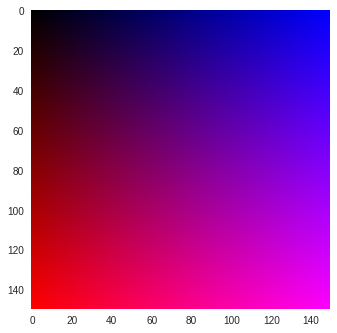

In [10]:
# Image demo - copied from lecture slides
def disc(size=150, r=50):
    im = Image.new("RGB", (size, size))
    for x in range(size):
        for y in range(size):
            if (x-size/2)**2 + (y-size/2)**2 < r**2:
                im.putpixel((x, y), (0, 0, 0))
            else:
                im.putpixel((x, y), (255, 255, 255))
    return im


def transition(size=150):
    im = Image.new('RGB', (size, size))    
    for x in range(size):
        for y in range(size):
            blue = int(x/size * 255)
            red = int(y/size * 255)
            im.putpixel((x, y), (red, 0, blue))
    return im
    
show_image(transition())

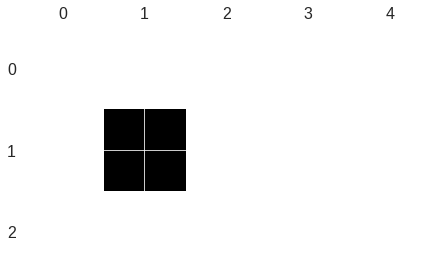

In [6]:
a = np.zeros((3, 5))
a[1,1] = 1
plt.matshow(a)